# MORFOLOGIA MATEMÁTICA

In [2]:
#Bibliotecas
import cv2
from matplotlib import pyplot as plt
import numpy as np 
import PIL.Image as Image
plt.style.use("dark_background")

## Importando a imagem para erosão

valor maxido de pixel da imagem original =  255 , e valor maximo de pixel da imagem normalizada =  1.0


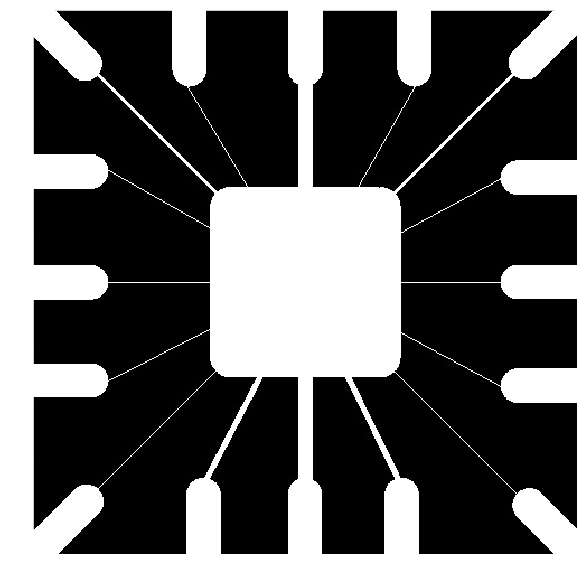

In [3]:
# IMPORTAR A IMAGEM
img = np.array(Image.open(r"D:\Users\malanga\mestrado\DL\Prática didática\Fig0905(a)(wirebond-mask).jpg"))

# NORMALIZAR A IMAGEM
img_n = (img - img.min())/(img.max()-img.min())

print("valor maxido de pixel da imagem original = ",img.max(), ', e valor maximo de pixel da imagem normalizada = ', img_n.max())

plt.figure(figsize = (10,10))
plt.imshow(img, cmap="Greys");

In [7]:
#Montando a mao o Kernel
tey = np.array([[0,1,0],[1,1,1],[0,1,0]])
print('A mão =',tey)

# função pronta do kernel 
N = 10
KC= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(N,N)) #   Mascara em cruz
print('Função pronta= ',KC)

A mão = [[0 1 0]
 [1 1 1]
 [0 1 0]]
Função pronta=  [[0 0 0 0 0 1 0 0 0 0]
 [0 0 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1]
 [0 0 1 1 1 1 1 1 1 0]]


# EROSAO

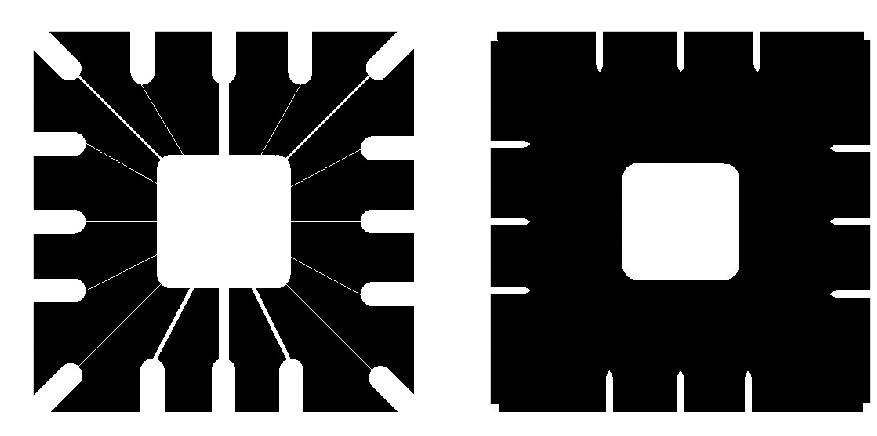

In [9]:
# KERNEL (k) 
N = 23
KR= cv2.getStructuringElement(cv2.MORPH_RECT,(N,N)) #   Mascara retangular 
KE= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(N,N)) #  Mascara eliptica
KC= cv2.getStructuringElement(cv2.MORPH_CROSS,(N,N)) #   Mascara em cruz

KQ = KR # escolha da mascara

erode = cv2.erode(img_n, KQ) 

plt.figure(figsize=[15,10]);
plt.subplot(1,2,1);plt.imshow(img, cmap='gray');plt.title('imagem original',size=25)
plt.subplot(1,2,2);plt.imshow(erode, cmap='gray');plt.title('imagem erodida',size=25);

# DILATAÇAO

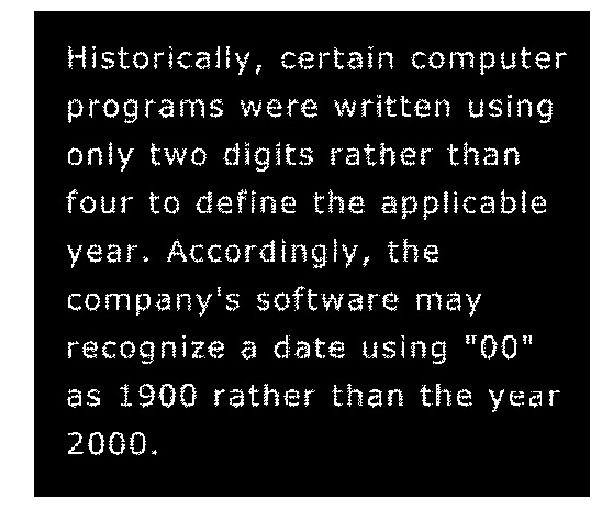

In [10]:
# IMPORTAR A IMAGEM
img2 = np.array(Image.open(r"D:\Users\malanga\mestrado\DL\Prática didática\Fig0907(a)(text_gaps_1_and_2_pixels).jpg"))
# NORMALIZAR A IMAGEM
img_n2 = (img2 - img2.min())/(img2.max()-img2.min())

plt.figure(figsize=(10,10))
plt.imshow(img2, cmap="Greys");

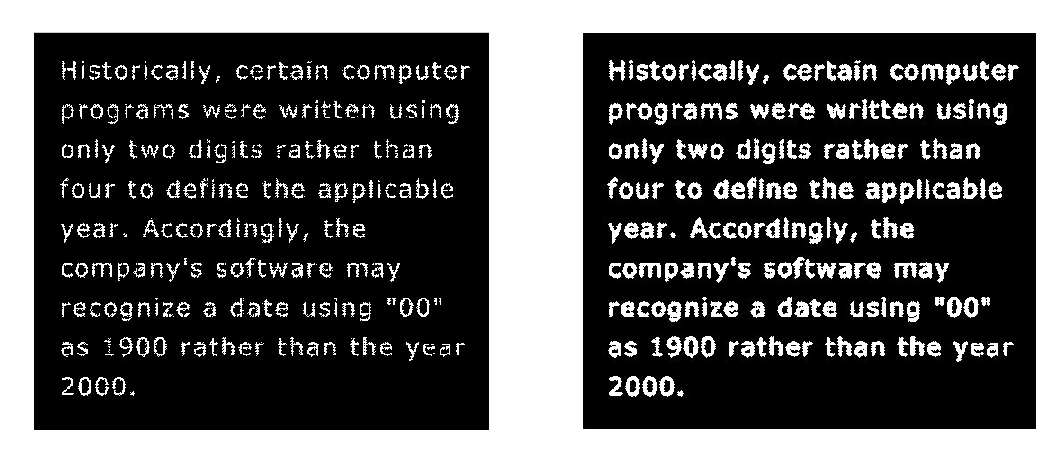

In [17]:
# KERNEL (k) 
N = 3
KR= cv2.getStructuringElement(cv2.MORPH_RECT,(N,N)) #   Mascara retangular 
KE= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(N,N)) #  Mascara eliptica
KC= cv2.getStructuringElement(cv2.MORPH_CROSS,(N,N)) #   Mascara em cruz

KQ = KC # escolha da mascara

dilate = cv2.dilate(img_n2, KQ, iterations=1) 

plt.figure(figsize=(18,10));
plt.subplot(1,2,1);plt.imshow(img_n2, cmap ='gray');plt.title('imagem original',size=25)
plt.subplot(1,2,2);plt.imshow(dilate, cmap ='gray');plt.title('imagem dilatada',size=25);

# Bordas internas, externas e gradiente morfológico

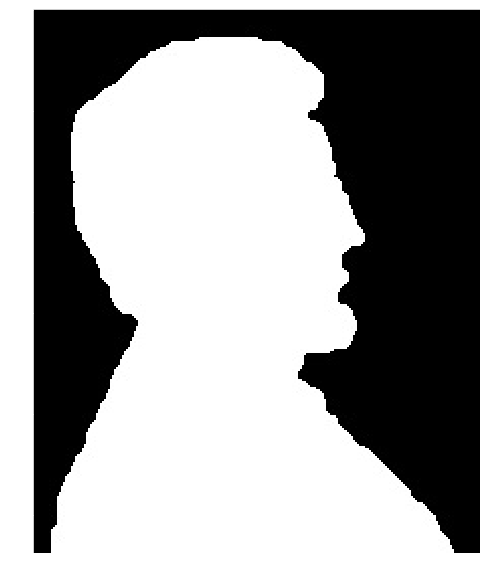

In [19]:
# IMPORTAR A IMAGEM
img3 = np.array(Image.open(r"D:\Users\malanga\mestrado\DL\Prática didática\Fig0914(a)(licoln from penny).jpg"))

# NORMALIZAR A IMAGEM
img_n3 = (img3 - img3.min())/(img3.max()-img3.min())

plt.figure(figsize=(10,10))
plt.imshow(img_n3, cmap="Greys");

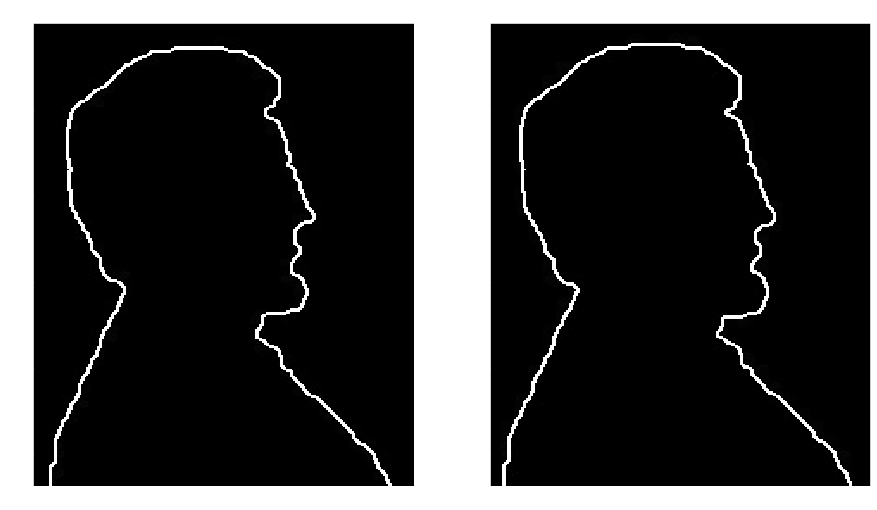

In [23]:
# Bordas internas e Externas
# KERNEL (k) 
N = 5
KR= cv2.getStructuringElement(cv2.MORPH_RECT,(N,N)) #   Mascara retangular 
KE= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(N,N)) #  Mascara eliptica
KC= cv2.getStructuringElement(cv2.MORPH_CROSS,(N,N)) #   Mascara em cruz

KQ = KE # escolha da mascara

# borda interna com a funçao pronta
interna = img_n3  - cv2.erode(img_n3, KQ);


#borda externa pronta
externa = cv2.dilate(img_n3, KQ) - img_n3;

plt.figure(figsize = (15,10));
plt.subplot(1,2,1);plt.imshow(interna, cmap='gray');plt.title('borda interna');
plt.subplot(1,2,2);plt.imshow(externa, cmap='gray');plt.title('borda externa');


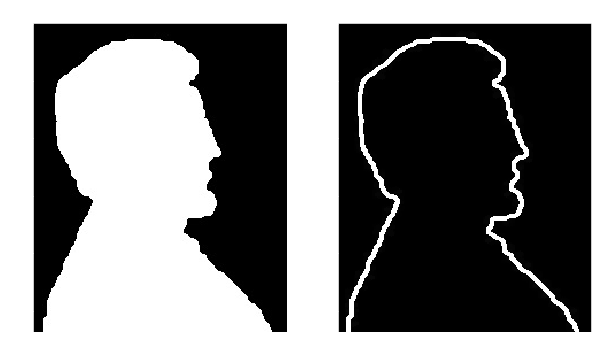

In [24]:
# Gradiente Morfológico

gm = cv2.dilate(img_n3,KQ) - cv2.erode(img_n3,KQ);

plt.figure(figsize = (10,10));
plt.subplot(1,2,1);plt.imshow(img_n3, cmap='gray');plt.title('Imagem original');
plt.subplot(1,2,2);plt.imshow(gm, cmap='gray');plt.title('Gradiente Morfológico');